What are the most demanded skills for top 3 data roles:

                            job_title  job_skills
16                  Big Data Engineer  powershell
16                  Big Data Engineer      python
16                  Big Data Engineer         sql
16                  Big Data Engineer       mysql
16                  Big Data Engineer  sql server
...                               ...         ...
785716    Application Support Analyst          c#
785716    Application Support Analyst         sql
785718  Senior Performance QA Analyst        None
785740             AWS System Analyst         aws
785740             AWS System Analyst        flow

[297707 rows x 2 columns]


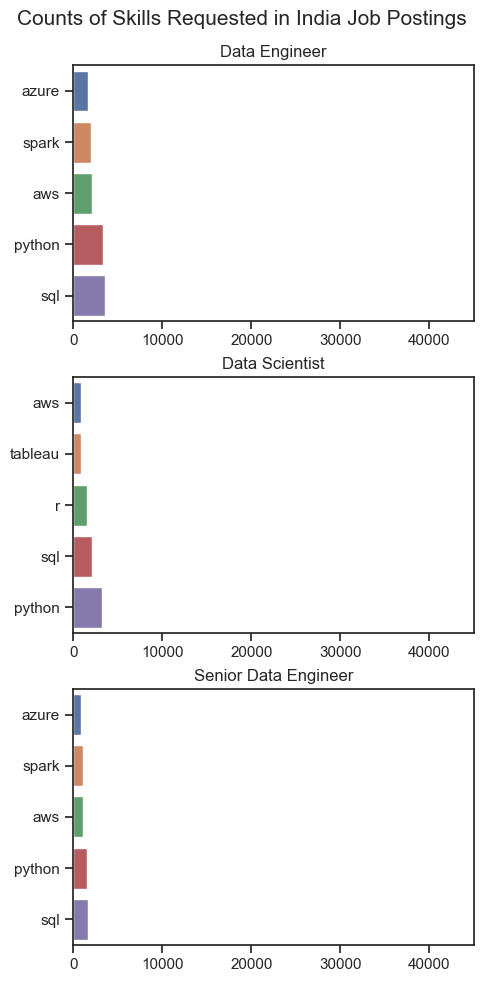

In [11]:
import ast
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Load datasets:
dataset = load_dataset('csv', data_files='C:\\Users\\kajal\\Downloads\\data_jobs.csv')
df = dataset['train'].to_pandas()

# Data cleaning:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter data for the Indian market:
df_india = df[df['job_country'] == 'India']
df_skills = df_india.explode('job_skills')
df_skills = df_skills[['job_title', 'job_skills']]
print(df_skills)

# Group by job_skills and job_title and count the number of occurrences
df_skill_count = df_skills.groupby(['job_skills', 'job_title']).size().reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skill_count.sort_values(by='skill_count', ascending=False, inplace=True)

# Get unique job titles and sort them
job_titles = df_skill_count['job_title'].unique().tolist()
job_titles = sorted(job_titles[:3])

# Create subplots
fig, ax = plt.subplots(len(job_titles), 1, figsize=(5, 10))  # Adjust the figsize as needed

sns.set_theme(style='ticks')

# Plotting
for i, job_title in enumerate(job_titles):
    df_plot = df_skill_count[df_skill_count['job_title'] == job_title].head(5)[::-1].sort_values(by='skill_count', ascending=False)
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='deep')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 45000)  # Make the scales the same

fig.suptitle('Counts of Skills Requested in India Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)  # Fix the overlap
plt.show()







now i am going to create list of top 3 roles: